In [211]:
import pandas as pd
import json
import requests as req
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import time

In [212]:
movie_df = pd.read_csv('movie_df.csv') #low_memory=False

movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])

movie_df = movie_df[movie_df["release_date"] > '2007']

del movie_df['budget']
del movie_df['Unnamed: 0']
#del movie_df['vote_average']
#del merge_df['vote_count']

movie_df = movie_df[movie_df.revenue != 0.0]
movie_df = movie_df.head(25)
type(movie_df['genres'])

pandas.core.series.Series

In [213]:
url = "http://www.omdbapi.com/?i=tt0463998"
answer = req.get(url+"&apikey=cfcaac6e")
answer = answer.json()
answer['Title']

'Freedom Writers'

In [214]:
url = "http://www.omdbapi.com/?i="
rating_list = []
for ID in movie_df['imdb_id']:
    response = req.get(url+ID+"&apikey=cfcaac6e")
    response = response.json()
    #response.keys()    
    #print(response['Title'])
    final_response = (response['Title'],
               response['imdbRating'],
               response['imdbVotes'])
    #print(final_response)
    rating_list.append(final_response)
    #time.sleep(5)


In [215]:
ratings = pd.DataFrame(rating_list, columns = ('title','rating','rating count'))

In [223]:
merge_df = pd.merge(movie_df, ratings, how = 'outer', on = 'title')
merge_df['genres']= merge_df['genres'].fillna("[{'name':''}]")
merge_df['genres']= merge_df['genres'].apply(lambda x:eval(x)[0]['name'])   #read up 

merge_df.head()

,belongs_to_collection,genres,id,imdb_id,original_language,overview,release_date,revenue,title,vote_average,vote_count,rating,rating count
0,NaN,Adventure,77221.0,tt1701210,en,"On the Arabian Peninsula in the 1930s, two war...",2011-12-21,5446000.0,Black Gold,5.9,77.0,NaN,NaN
1,NaN,Crime,1646.0,tt0463998,en,A young teacher inspires her class of at-risk ...,2007-01-05,41170784.0,Freedom Writers,7.6,368.0,7.5,"57,032"
2,NaN,Action,14396.0,tt0462229,en,"Cedric the Entertainer plays Jake, a seemingly...",2007-01-05,10337477.0,Code Name: The Cleaner,4.7,78.0,4.5,"10,275"
3,"{'id': 160727, 'name': 'Stomp the Yard Collect...",Drama,1931.0,tt0775539,en,"After the death of his younger brother, a trou...",2007-05-16,75511123.0,Stomp the Yard,6.1,90.0,5.3,"20,269"
4,NaN,Adventure,4283.0,tt0772193,en,A news team is sent to Burundi to capture and ...,2007-01-12,10597734.0,Primeval,4.7,45.0,4.7,"11,640"


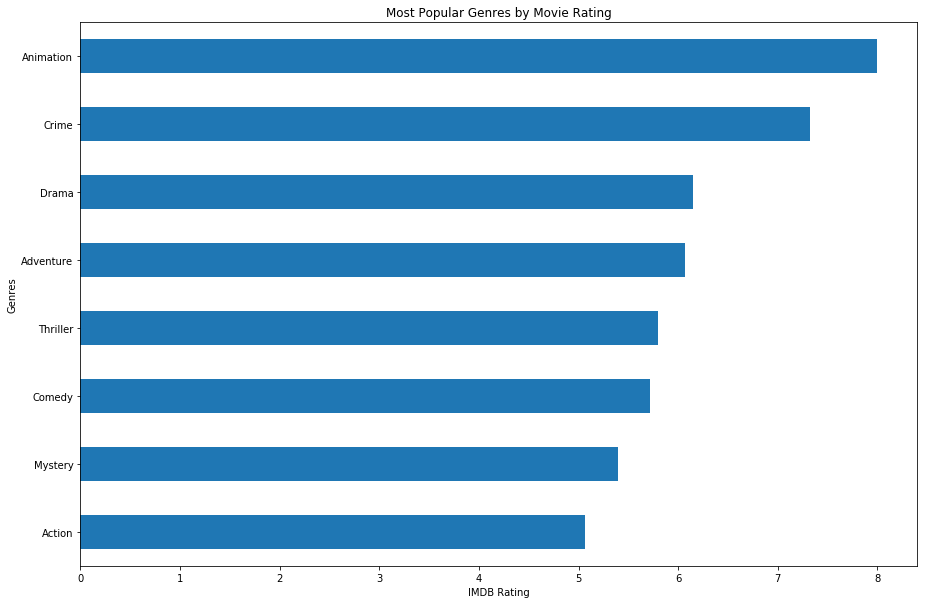

In [280]:
genres_list = [ 'Adventure', 'Action', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
               'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
               'TV Movie', 'Thriller', 'War', 'Western']

merge_df['rating'] = merge_df['rating'].astype('float')

new_merge = merge_df[merge_df['genres'].isin(genres_list)]
new_merge       

y = new_merge['rating'].groupby(new_merge['genres']).mean()
y = y.sort_values(ascending=True)

plt.figure(figsize=(15,10))
y.plot(kind="barh")
plt.title('Most Popular Genres by Movie Rating')
plt.ylabel('Genres')
plt.xlabel('IMDB Rating')

plt.savefig("Most Popular Genres by Movie Rating.png")
plt.show()


